In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')

In [31]:
X = wine.drop('quality' , 1).values #excluding quality column 
qua = wine['quality'].values #only the values of quality column
qua2 = qua <=5 # bad ones to boolean
qua2 = qua2.astype(int) #boolean dataframe to int to plot it properly

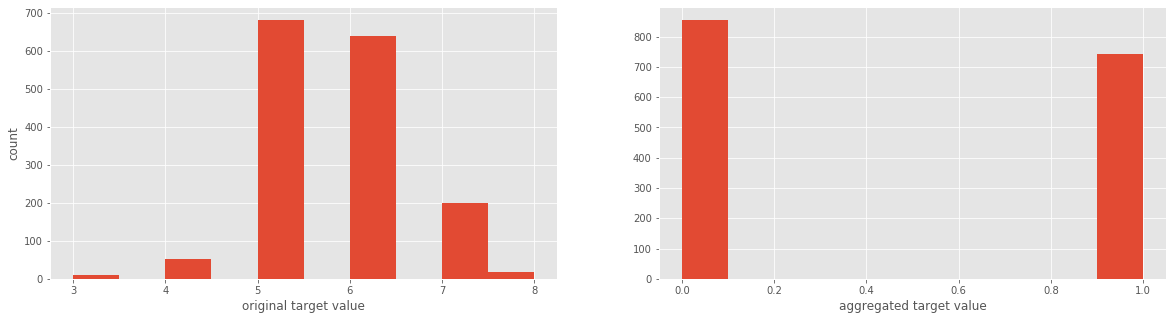

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(20,5));
plt.subplot(1,2,1);
plt.hist(qua);
plt.xlabel('Original Target')
plt.ylabel('Count')
plt.subplot(1,2,2);
plt.hist(qua2)
plt.xlabel('Aggregated Target') #seperated as good and bad
plt.show()

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, qua, test_size=0.2, random_state=100)
accscr = np.empty((30))
kvalues = np.empty((30))
for K in range(30):
    K_value = K + 1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights = 'uniform', algorithm = 'auto')
    model = neigh.fit(x_train,y_train)
    y_pred = neigh.predict(x_test)
    accscr[K] = accuracy_score(y_test,y_pred)*100
    kvalues[K] = K+1
    print("Accuracy is ", accscr[K], "% for K-value:" , K_value)
print('k-NN accuracy for test set: %f' % model.score(x_test, y_test))

Accuracy is  57.1875 % for K-value: 1
Accuracy is  50.625 % for K-value: 2
Accuracy is  49.6875 % for K-value: 3
Accuracy is  54.6875 % for K-value: 4
Accuracy is  54.6875 % for K-value: 5
Accuracy is  51.5625 % for K-value: 6
Accuracy is  53.75 % for K-value: 7
Accuracy is  52.81249999999999 % for K-value: 8
Accuracy is  51.24999999999999 % for K-value: 9
Accuracy is  49.0625 % for K-value: 10
Accuracy is  51.87500000000001 % for K-value: 11
Accuracy is  50.31250000000001 % for K-value: 12
Accuracy is  49.375 % for K-value: 13
Accuracy is  50.9375 % for K-value: 14
Accuracy is  51.24999999999999 % for K-value: 15
Accuracy is  51.87500000000001 % for K-value: 16
Accuracy is  50.9375 % for K-value: 17
Accuracy is  52.1875 % for K-value: 18
Accuracy is  53.43750000000001 % for K-value: 19
Accuracy is  54.37499999999999 % for K-value: 20
Accuracy is  54.0625 % for K-value: 21
Accuracy is  54.6875 % for K-value: 22
Accuracy is  53.75 % for K-value: 23
Accuracy is  54.37499999999999 % for K

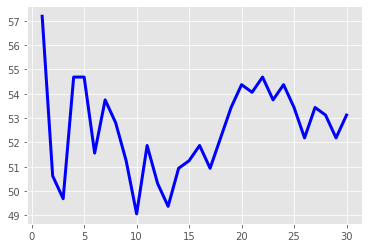

In [42]:
plt.plot(kvalues,accscr,color='blue',linewidth=3)
plt.show()

In [43]:
neigh = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform', algorithm = 'auto')
neigh.fit(x_train,y_train)
y_pred = neigh.predict(x_test)
conf = confusion_matrix(y_test,y_pred)
print(conf)

[[ 0  0  3  0  0  0]
 [ 0  0  4  7  1  0]
 [ 0  0 88 40  5  0]
 [ 0  0 63 63 11  0]
 [ 0  0  6 20  6  0]
 [ 0  0  2  1  0  0]]


In [46]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, model.predict(x_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        12
           5       0.55      0.66      0.60       133
           6       0.52      0.58      0.55       137
           7       0.33      0.09      0.15        32
           8       0.00      0.00      0.00         3

    accuracy                           0.53       320
   macro avg       0.23      0.22      0.22       320
weighted avg       0.49      0.53      0.50       320



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
from sklearn.preprocessing import scale
xs = scale(X)
xs_train, xs_test, y_train, y_test = train_test_split(xs, qua, test_size=0.2, random_state=42)
model2 = knn.fit(xs_train, y_train)
print('k-NN score for test set: %f' % model2.score(xs_test, y_test))
print('k-NN score for training set: %f' % model2.score(xs_train, y_train))
y_true, y_pred = y_test, model2.predict(xs_test)
print(classification_report(y_true, y_pred))

k-NN score for test set: 0.553125
k-NN score for training set: 0.718530
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.10      0.15        10
           5       0.60      0.68      0.64       130
           6       0.52      0.56      0.54       132
           7       0.52      0.33      0.41        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.33      0.28      0.29       320
weighted avg       0.54      0.55      0.54       320



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
accscr2 = np.empty((30))
kvalues2 = np.empty((30))
for K in range(30):
    K_value = K + 1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights = 'uniform', algorithm = 'auto')
    model = neigh.fit(xs_train,y_train)
    y_pred = neigh.predict(xs_test)
    accscr2[K] = accuracy_score(y_test,y_pred)*100
    kvalues2[K] = K+1
    print("Accuracy is ", accscr2[K], "% for K-value:" , K_value)
print('k-NN accuracy for test set: %f' % model.score(xs_test, y_test))

Accuracy is  61.875 % for K-value: 1
Accuracy is  54.0625 % for K-value: 2
Accuracy is  51.24999999999999 % for K-value: 3
Accuracy is  53.75 % for K-value: 4
Accuracy is  55.3125 % for K-value: 5
Accuracy is  56.56250000000001 % for K-value: 6
Accuracy is  55.3125 % for K-value: 7
Accuracy is  57.49999999999999 % for K-value: 8
Accuracy is  55.00000000000001 % for K-value: 9
Accuracy is  57.8125 % for K-value: 10
Accuracy is  56.56250000000001 % for K-value: 11
Accuracy is  56.25 % for K-value: 12
Accuracy is  57.8125 % for K-value: 13
Accuracy is  56.875 % for K-value: 14
Accuracy is  55.625 % for K-value: 15
Accuracy is  55.625 % for K-value: 16
Accuracy is  55.625 % for K-value: 17
Accuracy is  54.6875 % for K-value: 18
Accuracy is  51.24999999999999 % for K-value: 19
Accuracy is  52.81249999999999 % for K-value: 20
Accuracy is  54.6875 % for K-value: 21
Accuracy is  55.3125 % for K-value: 22
Accuracy is  55.3125 % for K-value: 23
Accuracy is  55.00000000000001 % for K-value: 24
Ac

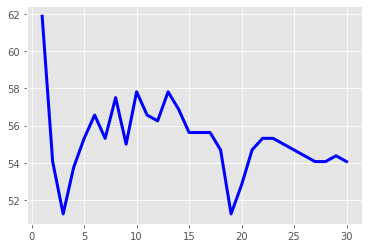

In [57]:
plt.plot(kvalues2,accscr2,color='blue',linewidth=3)
plt.show()